In [1]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


## Carga y Exploración de Datos
Cargamos los datos desde un archivo Excel con diferentes hojas. Nos enfocamos en `cluster 1-6` y `cluster 1-7` porque contienen la información principal del análisis.

Antes de unirlos, verificamos que las columnas coincidan y eliminamos filas innecesarias.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [3]:

# Cargar el archivo Excel
file_path = "./subclase_1153.xlsx"
xls = pd.ExcelFile(file_path)

# Ver las hojas disponibles en el archivo
print(xls.sheet_names)

['pronostico', 'Sheet1', 'cluster 1-6', 'cluster 1-7', 'label_pronostico', 'label_tienda']


In [4]:
# Cargamos las hojas de los clusters
df_6 = xls.parse("cluster 1-6").iloc[:16830] # Solo tenemos entradas hasta la fila 16830
df_7 = xls.parse("cluster 1-7")


# Combinar ambos datasets
df = pd.concat([df_6, df_7], ignore_index=True)


Se confirmaron las columnas disponibles y la cantidad de datos. Se identificó que cluster 1-6 solo tiene valores hasta la fila 16830, lo que puede causar datos faltantes al fusionarlo con cluster 1-7.

## Análisis general de los datos
Revisamos los datos que tenemos con base en sus variables. 
El objetivo principal es entender y las columnas, los valores, los tipos de datos y los valores faltantes


In [5]:
# Revisamos la estructura combinada
print(df.head())

   subclase_id  label_producto  label_tienda  pronostico_id  venta_mensual  \
0       1153.0             1.0           6.0       188135.0           4.22   
1       1153.0             1.0           6.0       189213.0           4.22   
2       1153.0             1.0           6.0       189225.0           4.22   
3       1153.0             1.0           6.0       189060.0           4.31   
4       1153.0             1.0           6.0       190566.0         420.25   

   precio_cat     año   mes  precio_mensual  volumen_mensual  ...  m7.1  m8.1  \
0        1.00  2016.0  11.0        4.220000              1.0  ...   NaN   NaN   
1        0.00  2016.0  11.0        4.220000              1.0  ...   NaN   NaN   
2        0.00  2016.0  11.0        4.220000              1.0  ...   NaN   NaN   
3        0.00  2016.0  11.0        4.310000              1.0  ...   NaN   NaN   
4        0.01  2016.0  11.0        7.504464             56.0  ...   NaN   NaN   

   m9.1  m10.1  m11.1  m12.1  trimestre.1  T

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17011 entries, 0 to 17010
Data columns (total 60 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   subclase_id            17010 non-null  float64
 1   label_producto         17010 non-null  float64
 2   label_tienda           17010 non-null  float64
 3   pronostico_id          17010 non-null  float64
 4   venta_mensual          17010 non-null  float64
 5   precio_cat             17010 non-null  float64
 6   año                    17010 non-null  float64
 7   mes                    17010 non-null  float64
 8   precio_mensual         17010 non-null  float64
 9   volumen_mensual        17010 non-null  float64
 10  venta_costo_mensual    17010 non-null  float64
 11  year                   17010 non-null  float64
 12  costo_prov             17011 non-null  float64
 13  m1                     17010 non-null  float64
 14  m2                     17010 non-null  float64
 15  m3

In [7]:
print(df.describe())  # Estadísticas generales de las variables numéricas

       subclase_id  label_producto  label_tienda  pronostico_id  \
count      17010.0         17010.0  17010.000000   17010.000000   
mean        1153.0             1.0      6.010641  256952.055791   
std            0.0             0.0      0.102607   96402.190595   
min         1153.0             1.0      6.000000  185533.000000   
25%         1153.0             1.0      6.000000  192987.000000   
50%         1153.0             1.0      6.000000  196951.000000   
75%         1153.0             1.0      6.000000  405180.000000   
max         1153.0             1.0      7.000000  407107.000000   

       venta_mensual    precio_cat           año           mes  \
count   17010.000000  17010.000000  17010.000000  17010.000000   
mean     3204.557720     85.010750   2017.429336      6.280423   
std      7620.408574     37.884831      0.599526      3.243416   
min         0.010000      0.000000   2016.000000      1.000000   
25%       222.420000     49.900000   2017.000000      4.000000   


In [8]:
# Porcentaje de valore faltantes
(df.isnull().sum()/(len(df)))*100

subclase_id                0.005879
label_producto             0.005879
label_tienda               0.005879
pronostico_id              0.005879
venta_mensual              0.005879
precio_cat                 0.005879
año                        0.005879
mes                        0.005879
precio_mensual             0.005879
volumen_mensual            0.005879
venta_costo_mensual        0.005879
year                       0.005879
costo_prov                 0.000000
m1                         0.005879
m2                         0.005879
m3                         0.005879
m4                         0.005879
m5                         0.005879
m6                         0.005879
m7                         0.005879
m8                         0.005879
m9                         0.005879
m10                        0.005879
m11                        0.005879
m12                        0.005879
trimestre                  0.005879
T2                         0.000000
T3                         0

## Clasificación de Variables
Las variables se agruparon en:
- **Categóricas:** Identificadores (`subclase_id`, `label_tienda`, `pronostico_id`).
- **Numéricas:** Datos cuantitativos (`venta_mensual`, `precio_mensual`, etc.).
- **Binarias:** Indicadores de meses (`m1-m12`) y trimestres (`T2-T4`).

In [9]:

# Clasificación manual de variables con nombres corregidos
categorical_vars = [
    "subclase_id", "label_producto", "label_tienda", "pronostico_id", 
    "año", "mes", "trimestre", "T2", "T3", "T4", "year"
]

numerical_vars = [
    "venta_mensual", "precio_cat", "precio_mensual", "volumen_mensual", 
    "venta_costo_mensual", "costo_prov"
]

binary_vars = [f"m{i}" for i in range(1, 13)] + ["T2", "T3", "T4"]

# Crear DataFrame con la clasificación
classification_df = pd.DataFrame({
    "Variables Categóricas": pd.Series(categorical_vars),
    "Variables Numéricas": pd.Series(numerical_vars),
    "Variables Binarias": pd.Series(binary_vars)
})

# Mostrar la clasificación
print(classification_df)

   Variables Categóricas  Variables Numéricas Variables Binarias
0            subclase_id        venta_mensual                 m1
1         label_producto           precio_cat                 m2
2           label_tienda       precio_mensual                 m3
3          pronostico_id      volumen_mensual                 m4
4                    año  venta_costo_mensual                 m5
5                    mes           costo_prov                 m6
6              trimestre                  NaN                 m7
7                     T2                  NaN                 m8
8                     T3                  NaN                 m9
9                     T4                  NaN                m10
10                  year                  NaN                m11
11                   NaN                  NaN                m12
12                   NaN                  NaN                 T2
13                   NaN                  NaN                 T3
14                   NaN 

## Distribución de Variables Numéricas
Analizamos las distribuciones de variables clave:
- **`venta_mensual`** → Tiene una fuerte asimetría a la derecha (**skewness 11.72**), lo que indica la presencia de outliers con valores extremadamente altos.
- **`volumen_mensual`** → Similar a `venta_mensual`, también muestra valores atípicos.
- **`precio_cat`** → Distribución casi simétrica, lo que indica que los precios están equilibrados.


📌 **venta_mensual**
🔹 **Skewness (Asimetría):** 11.72
----------------------------------------


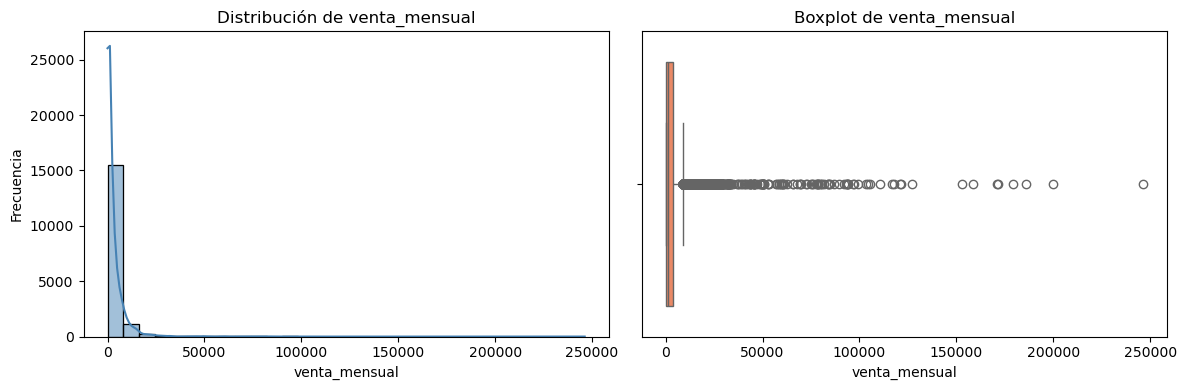


📌 **precio_cat**
🔹 **Skewness (Asimetría):** 0.07
----------------------------------------


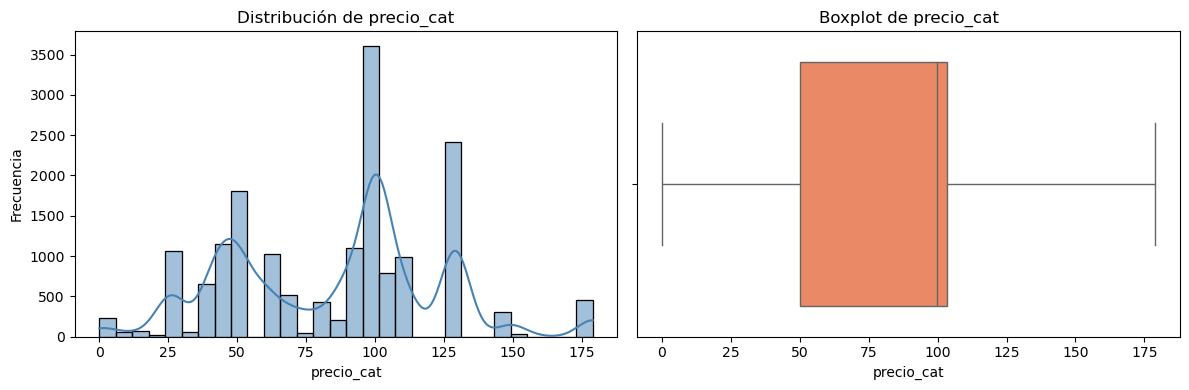


📌 **precio_mensual**
🔹 **Skewness (Asimetría):** 0.34
----------------------------------------


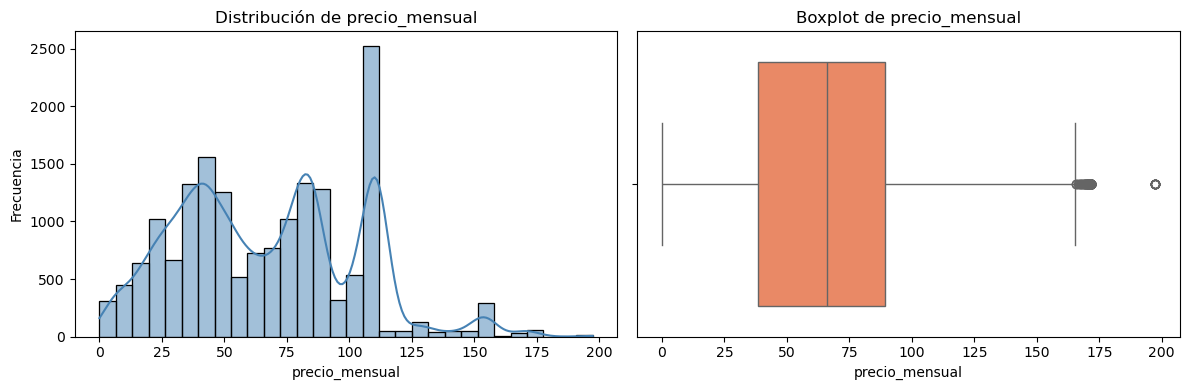


📌 **volumen_mensual**
🔹 **Skewness (Asimetría):** 11.9
----------------------------------------


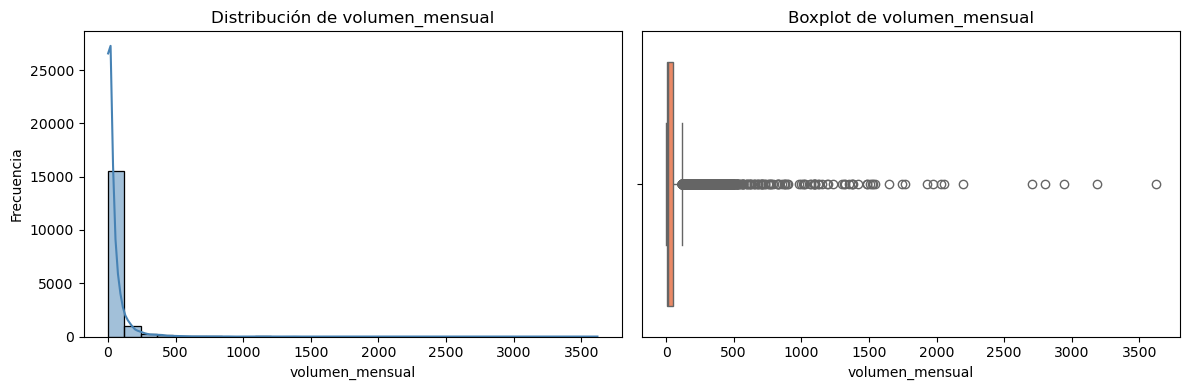


📌 **venta_costo_mensual**
🔹 **Skewness (Asimetría):** 12.23
----------------------------------------


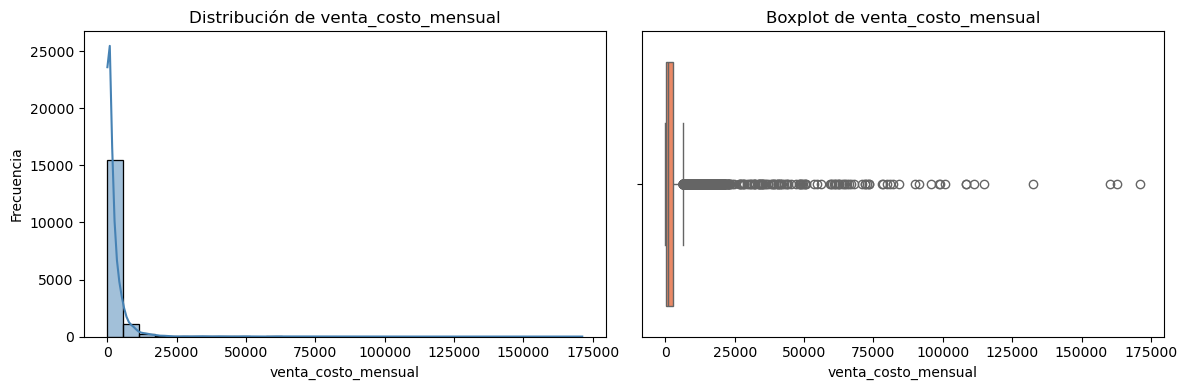


📌 **costo_prov**
🔹 **Skewness (Asimetría):** 0.71
----------------------------------------


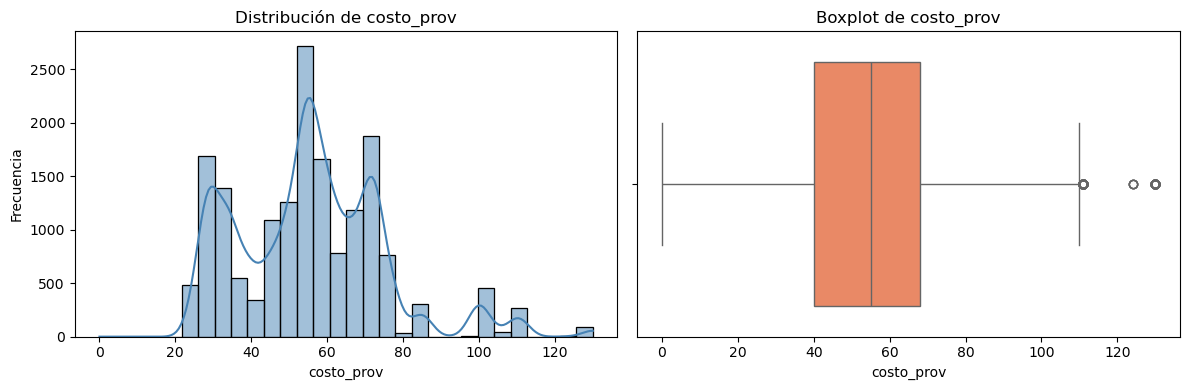

In [10]:

# Función mejorada para analizar variables numéricas
def analyze_numerical_columns(df, numerical_vars):
    for col in numerical_vars:
        skewness = round(df[col].skew(), 2)

        print(f"\n📌 **{col}**")
        print(f"🔹 **Skewness (Asimetría):** {skewness}")
        print("-" * 40)

        # Crear figura con dos gráficos
        fig, axes = plt.subplots(1, 2, figsize=(12, 4))

        # Histograma con KDE
        sns.histplot(df[col], bins=30, kde=True, ax=axes[0], color="steelblue")
        axes[0].set_title(f"Distribución de {col}")
        axes[0].set_ylabel("Frecuencia")

        # Boxplot
        sns.boxplot(x=df[col], ax=axes[1], color="coral")
        axes[1].set_title(f"Boxplot de {col}")

        plt.tight_layout()
        plt.show()

# Ejecutar la función con las variables numéricas
analyze_numerical_columns(df, numerical_vars)

Podemos notar que algunas variables tienen una fuerte asimetría (valores extremos). Podriamos aplicar transformaciones logarítmicas o análisis de outliers para mejorar la distribución.

## Distribución de Variables Categóricas
Analizamos las variables categóricas principales:
- **`mes` y `trimestre`** → Muestran una distribución relativamente uniforme, lo que indica que los datos cubren varios periodos sin grandes sesgos.

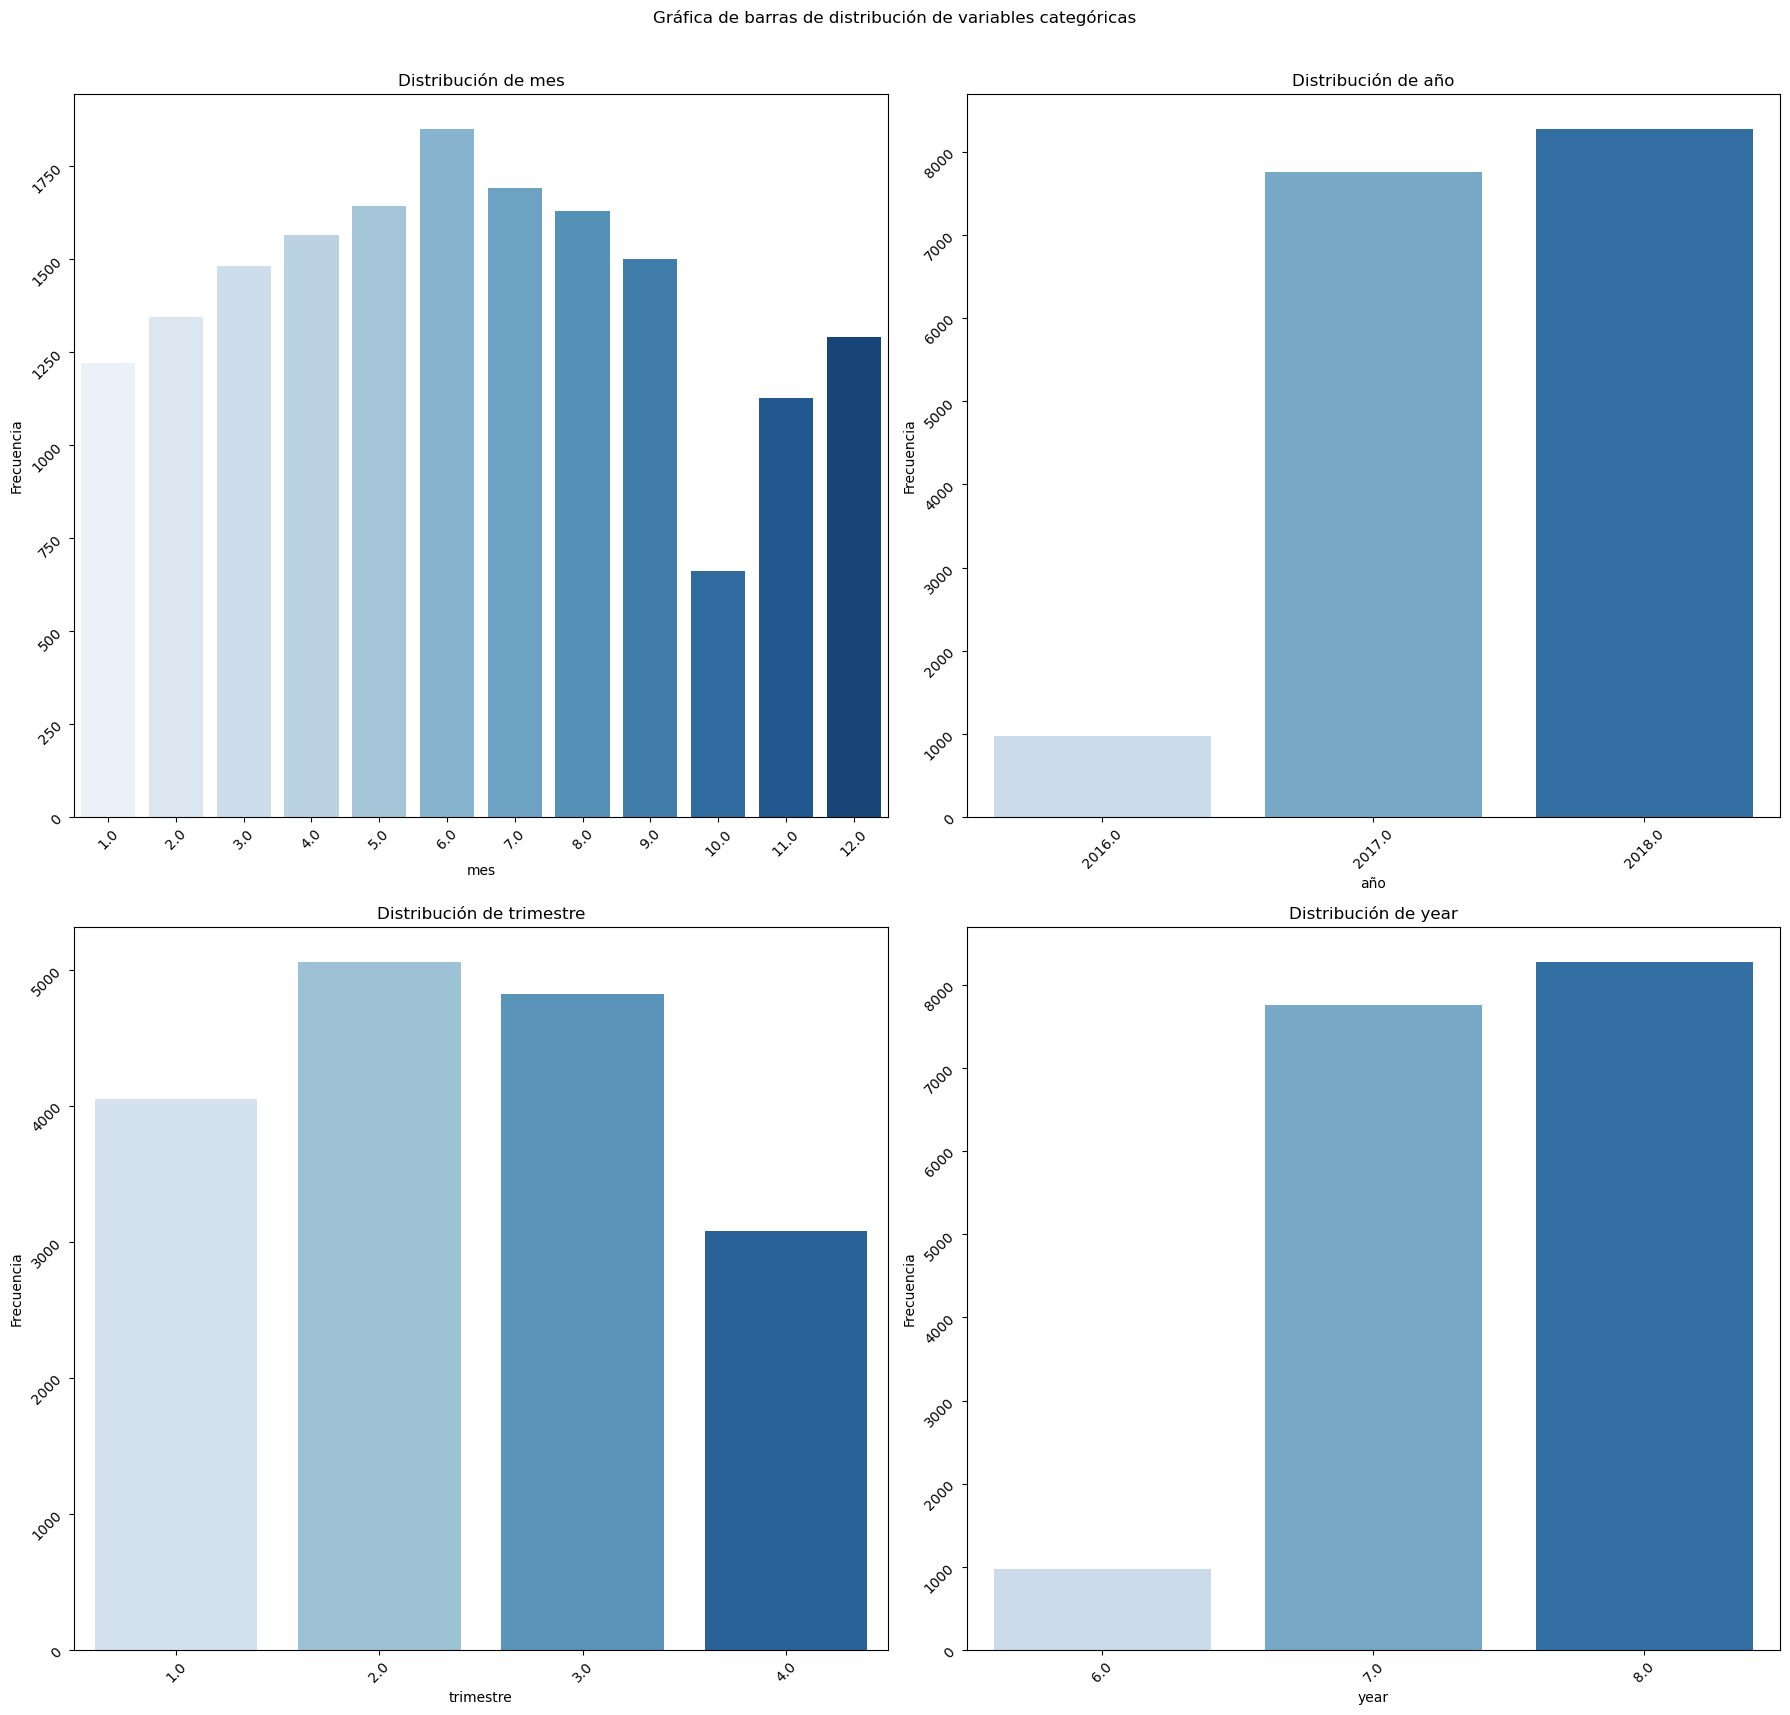

In [11]:
# Seleccionamos las variables categóricas que queremos visualizar
visual_cat_vars = ["mes", "año", "trimestre", "year"]

# Creamos las gráficas
fig, axes = plt.subplots(len(visual_cat_vars) // 2 + len(visual_cat_vars) % 2, 2, figsize=(18, 18))
fig.suptitle('Gráfica de barras de distribución de variables categóricas')

# Aplanamos el eje
axes = axes.flatten()

# Generamos count plots con gradiente de colores según la frecuencia
for i, col in enumerate(visual_cat_vars):
    value_counts = df[col].value_counts()
    colors = sns.color_palette("Blues", len(value_counts))  # Gradiente de azul según la frecuencia

    sns.barplot(ax=axes[i], x=value_counts.index, y=value_counts.values, palette=colors)
    axes[i].set_title(f'Distribución de {col}')
    axes[i].set_ylabel('Frecuencia')
    axes[i].tick_params(labelrotation=45)

# Eliminamos subgráficas vacías si hay un número impar de variables
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

## Análisis Bivariado
Evaluamos las relaciones entre diferentes variables:
- **Precio vs. Ventas (`precio_mensual` vs. `venta_mensual`)** → Baja correlación, lo que indica que el precio no es el único factor que influye en las ventas.
- **Volumen vs. Ventas (`volumen_mensual` vs. `venta_mensual`)** → Correlación positiva fuerte, lo que confirma que a mayor volumen, mayor venta.
- **Mes vs. Ventas** → Patrón estacional leve, con picos en ciertos meses.


<Figure size 1300x1700 with 0 Axes>

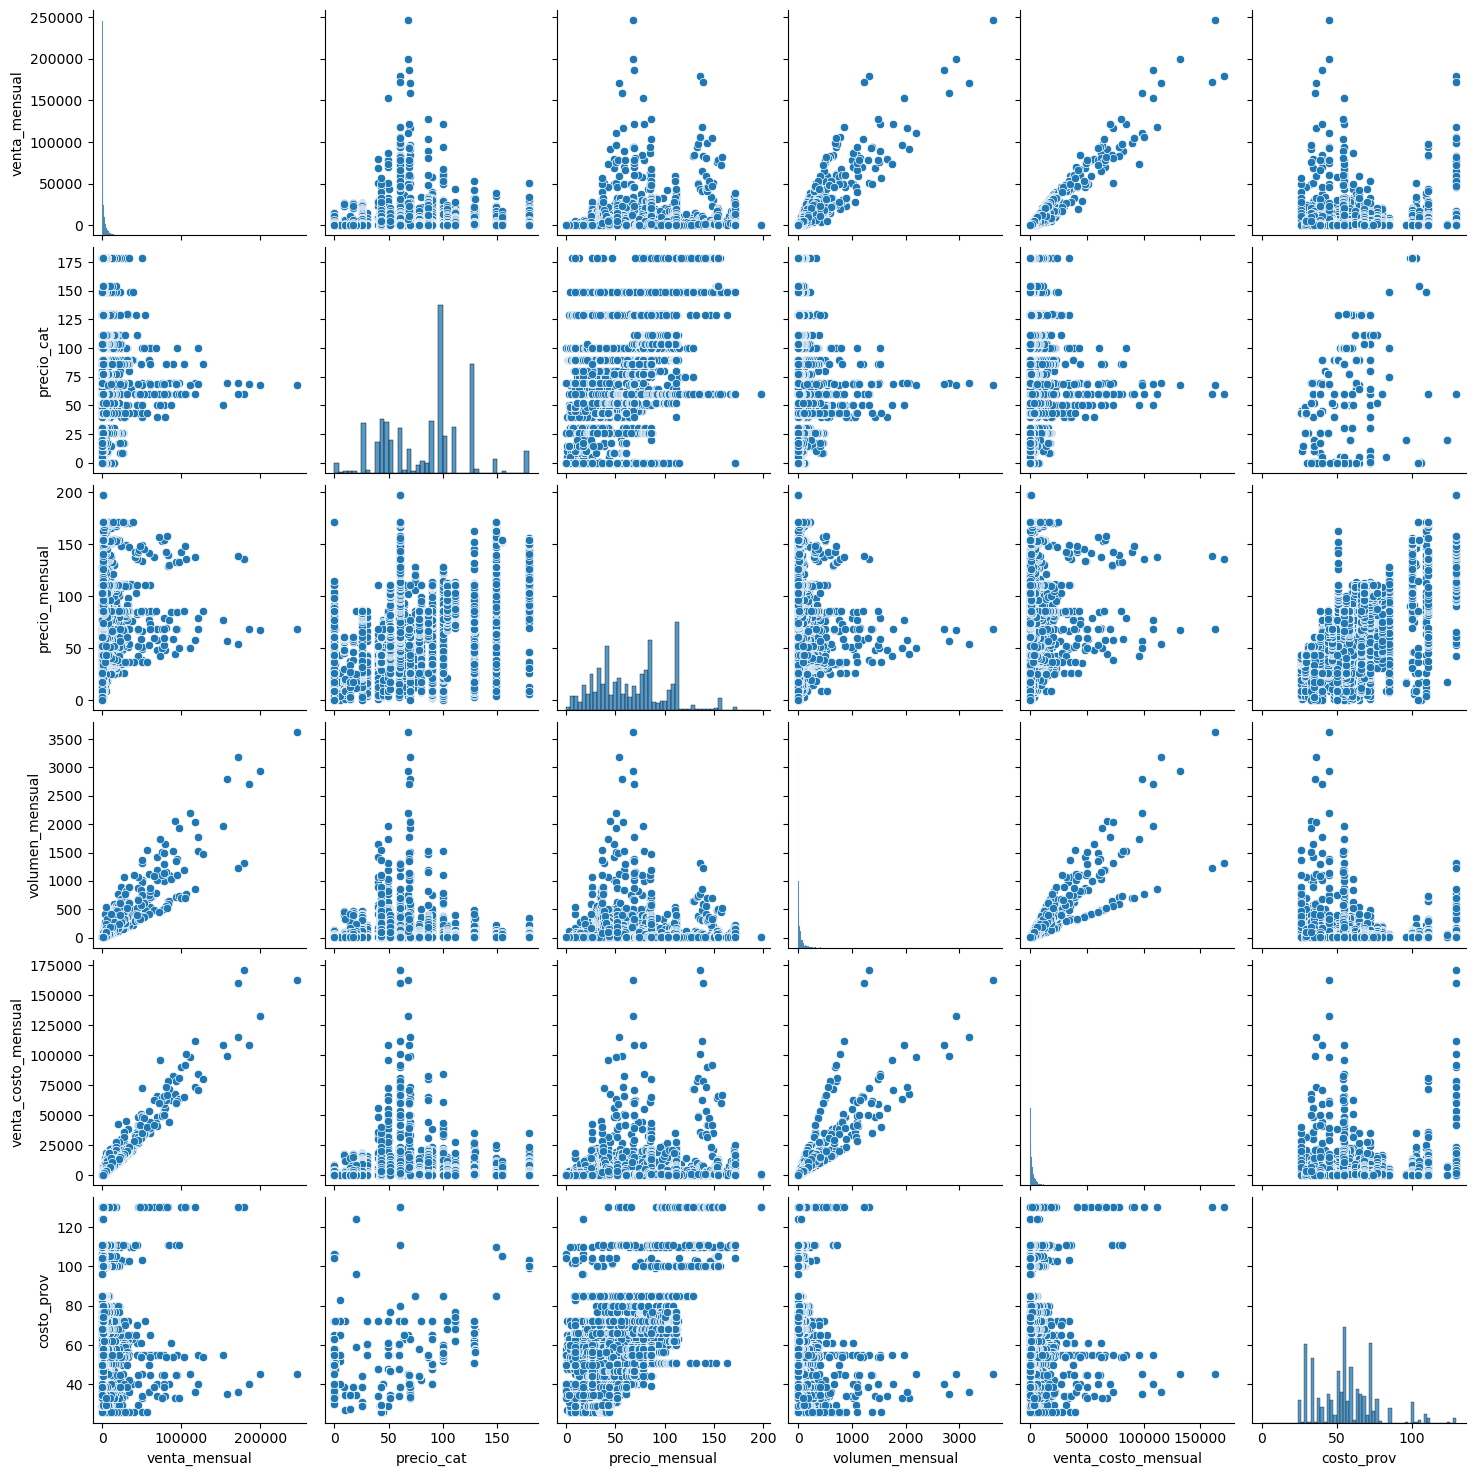

In [14]:
# Crear pairplot con seaborn
plt.figure(figsize=(13, 17))
sns.pairplot(df[numerical_vars])
plt.show()

## Heatmap de Correlación
Visualizamos las relaciones entre variables numéricas:
- **Alta correlación entre `volumen_mensual` y `venta_mensual`** → Confirma que el volumen es el principal motor de ventas.
- **Relación baja entre `precio_cat` y `ventas` ** → Sugiere que los clientes compran independientemente del precio.

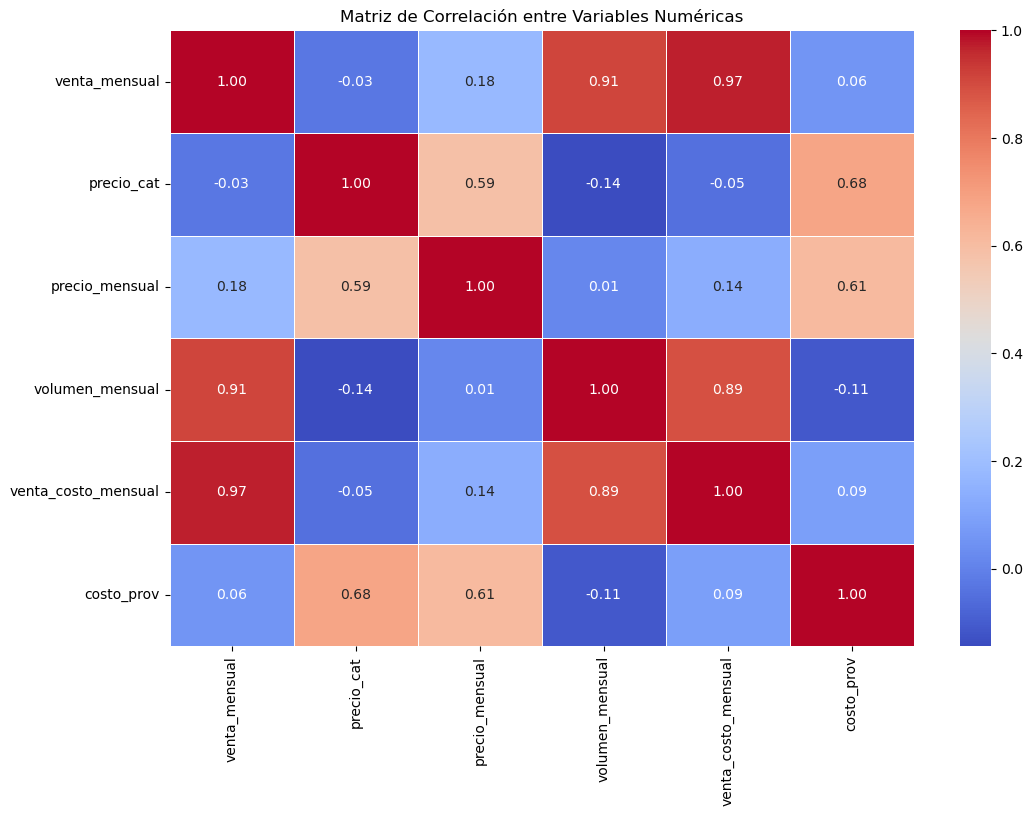

In [15]:

# Calcular la matriz de correlación
correlation_matrix = df[numerical_vars].corr()

# Crear el heatmap con seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.show()

# 📌 Conclusiones del Análisis Exploratorio

Podemos concluir que **las ventas en la empresa de retail están más influenciadas por el volumen de productos vendidos que por el precio**. A continuación, se detallan los principales hallazgos y sus implicaciones.

---

## 🔹 1. No Identificamos una Estacionalidad Extremadamente Marcada  
Revisamos la distribución de las ventas mensuales (`venta_mensual`) y observamos que, si bien hay cierta variabilidad a lo largo del año, **no se encontró un patrón estacional extremo**.

---

## 🔹 2. Identificamos que el Volumen de Venta es el Principal Impulsor de Ingresos  
Al analizar la correlación entre `volumen_mensual` y `venta_mensual`, encontramos una relación **fuerte y positiva**. Esto indica que **los productos con mayor disponibilidad tienden a generar más ingresos**. En cambio, la relación entre `precio_mensual` y `venta_mensual` es muy baja, lo que sugiere que el precio no es un factor determinante en la compra.


---

## 🔹 3. Revisamos el Impacto de las Tiendas en las Ventas y Encontramos Desequilibrios  
Al analizar `label_tienda`, observamos que **la mayoría de las ventas provienen de un grupo reducido de tiendas**, mientras que otras tienen una participación mínima.


---

## 🔹 4. Encontramos Ventas Atípicas que Deben Ser Analizadas  
Identificamos valores **extremadamente altos en `venta_mensual`**, lo que podría deberse a **ventas excepcionales o errores en los datos**.

---

## 🔹 5. No Encontramos Correlaciones Fuertes en la Estacionalidad  
Evaluamos la relación entre `mes`, `trimestre` y `venta_mensual` y encontramos que, aunque existen diferencias en las ventas, **no hay una correlación extremadamente fuerte** con estos factores.


---

## 📌 Conclusión General  
✔️ **El volumen de venta es el principal impulsor de ingresos**, por lo que se debe asegurar la disponibilidad de productos en todo momento.  
✔️ **El precio no es un factor determinante en la compra**, lo que sugiere que los esfuerzos deben centrarse en estrategias de valor agregado y optimización de stock.  
✔️ **Algunas tiendas tienen un impacto mínimo en las ventas**, lo que indica una oportunidad para optimizar la distribución de productos.  
✔️ **Se detectaron ventas atípicas** que requieren revisión para determinar si corresponden a promociones exitosas o errores de captura.  
✔️ **No se observó una fuerte dependencia de la estacionalidad**, lo que permite aplicar estrategias más equilibradas a lo largo del año.  


